In [139]:
# Install packages needed

pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [141]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [142]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

     |████████████████████████████████| 13.7 MB 3.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [143]:
# Import NLTK package

import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [144]:
# Import packages

import re
import numpy as np
import pandas as pd

# Gensim for buidling LDA model
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#from gensim.utils import tokenize
from gensim.models.phrases import Phrases, Phraser #ENGLISH_CONNECTOR_WORDS
 
# spacy for lemmatization
import spacy

import collections 

In [146]:
# NLTK Stop words
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add('hospital')
stop_words.add('could')
stop_words.add('would')
stop_words.add('also')
stop_words.add('really')
stop_words.add('one')
stop_words.add('thing')
stop_words.add('much')
stop_words.add('lot')
stop_words.add('day')
stop_words.add('way')
stop_words.add('someone')
stop_words.add('anything')
stop_words.add('back')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/linxin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'anything',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'back',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'could',
 'couldn',
 "couldn't",
 'd',
 'day',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'hospital',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'lot',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'much',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'one'

In [147]:
original_data = pd.read_csv('All_Data_Original.csv')
original_data

,code,label,subcategory,feedback,space,sentiment_score,sentiment tag
0,xn,Couldn't be improved,Nothing to improve,Nothing.,0,NaN,NaN
1,ee,Environment/ facilities,Environment/ facilities,Temperature in theatre a little low.,5,NaN,NaN
2,ap,Access,Provision of services,Same service available at Bingham Health Centre.,6,NaN,NaN
3,mi,Communication,Amount/clarity of information,Appointment details given over phone - no phys...,26,NaN,NaN
4,mm,Communication,Communication,On one occasion I was not made aware that my a...,45,NaN,NaN
...,...,...,...,...,...,...,...
12288,ce,Care received,Emotional care,The last month or so has been traumatising for...,181,NaN,NaN
12289,cs,Care received,Advice and support,Started to feel unwell with the thoughts aroun...,57,NaN,NaN
12290,ap,Access,Provision of services,"Around this time last year, I made plans to en...",428,NaN,NaN
12291,sp,Staff,Professionalism/Competence Of Staff,We got assigned Hazel back in 2019 to assist w...,159,NaN,NaN


In [148]:
# Filtering out short sentences, 'space' represents the number of spaces in the comment

original_data = original_data[original_data['space'] > 10]
original_data

,code,label,subcategory,feedback,space,sentiment_score,sentiment tag
3,mi,Communication,Amount/clarity of information,Appointment details given over phone - no phys...,26,NaN,NaN
4,mm,Communication,Communication,On one occasion I was not made aware that my a...,45,NaN,NaN
5,eq,Environment/ facilities,Facilities/equipment,The blood pressure monitor and cuff smelt of c...,36,NaN,NaN
8,da,Dignity,Respect For Diversity/ Person-Centeredness,2 Staff Members I had an issue with in regards...,26,NaN,NaN
10,mm,Communication,Communication,"Be more specific with time of visit, i.e. earl...",15,NaN,NaN
...,...,...,...,...,...,...,...
12288,ce,Care received,Emotional care,The last month or so has been traumatising for...,181,NaN,NaN
12289,cs,Care received,Advice and support,Started to feel unwell with the thoughts aroun...,57,NaN,NaN
12290,ap,Access,Provision of services,"Around this time last year, I made plans to en...",428,NaN,NaN
12291,sp,Staff,Professionalism/Competence Of Staff,We got assigned Hazel back in 2019 to assist w...,159,NaN,NaN


In [149]:
original_data.to_csv('LDA_comments.csv')

In [150]:
original_data['label'].value_counts()

Care received              2462
Staff                      1774
Communication               564
Access                      358
Environment/ facilities     231
Dignity                     174
Transition/coordination     127
Couldn't be improved         66
Miscellaneous                58
Name: label, dtype: int64

In [151]:
original_comments = original_data['feedback']
original_comments

3        Appointment details given over phone - no phys...
4        On one occasion I was not made aware that my a...
5        The blood pressure monitor and cuff smelt of c...
8        2 Staff Members I had an issue with in regards...
10       Be more specific with time of visit, i.e. earl...
                               ...                        
12288    The last month or so has been traumatising for...
12289    Started to feel unwell with the thoughts aroun...
12290    Around this time last year, I made plans to en...
12291    We got assigned Hazel back in 2019 to assist w...
12292    My experience of the team was positive. I was ...
Name: feedback, Length: 5814, dtype: object

In [152]:
# Delete meaningless words

original_comments = [re.sub('xxx','', sent) for sent in original_comments]
original_comments = [re.sub('XXX','', sent) for sent in original_comments]
original_comments = [re.sub('xxxx','', sent) for sent in original_comments]
original_comments = [re.sub('XXXX','', sent) for sent in original_comments]
original_comments = [re.sub('&nbsp','', sent) for sent in original_comments]

In [153]:
original_comments[3]

'2 Staff Members I had an issue with in regards to lack of patience with my capabilities, seeming to be interested in moving onto the next job.'

In [154]:
# Tokenize and remove punctuations

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

comments_words = list(sent_to_words(original_comments))

print(comments_words[0])

['appointment', 'details', 'given', 'over', 'phone', 'no', 'physical', 'evidence', 'reminder', 'which', 'could', 'cause', 'problems', 'other', 'than', 'that', 'nothing', 'apparent', 'thank', 'you', 'service', 'on', 'the', 'day', 'excellent', 'thank', 'you']


In [155]:
# Build Bigram model

bigram = gensim.models.Phrases(comments_words, min_count=5, threshold=100) # higher threshold fewer phrases.

bigram_mod = gensim.models.phrases.Phraser(bigram)


In [156]:
print(bigram_mod[comments_words[2]])

['the', 'blood_pressure', 'monitor', 'and', 'cuff', 'smelt', 'of', 'cigarettes', 'which', 'was', 'quite', 'unpleasant', 'also', 'old', 'perfume', 'aftershave', 'don', 'know', 'if', 'there', 'is', 'any', 'way', 'of', 'removing', 'the', 'smell', 'in', 'between', 'users', 'but', 'it', 'would', 'be', 'an', 'improvement']


In [157]:
# Define pre-processing functions

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def remove_stopwords(texts):
    return [[word for word in doc if word not in stop_words] for doc in texts]
 
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# lemmatization function withour filtering
def lemmatization_normal(texts):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])
    return texts_out

# lemmatizaiton function keeping noun, adj and adv
def lemmatization_keep(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# lemmatiziaon function filtering out verbs
def lemmatization_drop(texts):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ != 'VERB'])
    return texts_out


In [158]:
# Remove Stop Words
comments_words_nostops = remove_stopwords(comments_words)
 
# Form Bigrams
comments_words_bigrams = make_bigrams(comments_words_nostops)

# Lemmatization
comments_lemmatized = lemmatization_drop(comments_words_bigrams)
comments_lemmatized_1 = lemmatization_drop(comments_lemmatized)
comments_final = remove_stopwords(comments_lemmatized_1)

In [159]:
comments_final[3]

['staff',
 'member',
 'issue',
 'lack',
 'patience',
 'capability',
 'interested',
 'onto',
 'next',
 'job']

In [160]:
# Get the 200 words with the highest frequency

word_counts = collections.Counter([word for words in comments_final for word in words]) # 对分词做词频统计
word_counts_top = word_counts.most_common(200) # 获取前10最高频的词
print (word_counts_top)

[('staff', 2228), ('good', 1500), ('time', 1487), ('well', 1337), ('service', 1122), ('patient', 930), ('team', 894), ('like', 871), ('care', 821), ('helpful', 816), ('support', 755), ('ward', 675), ('group', 663), ('child', 617), ('always', 613), ('people', 584), ('week', 515), ('session', 505), ('friendly', 497), ('home', 490), ('great', 482), ('thank', 456), ('excellent', 448), ('course', 447), ('help', 418), ('happy', 413), ('nurse', 402), ('son', 373), ('family', 372), ('able', 365), ('everything', 361), ('mental_health', 351), ('year', 348), ('first', 341), ('new', 339), ('work', 337), ('life', 326), ('treatment', 324), ('enough', 319), ('everyone', 316), ('appointment', 314), ('nothing', 311), ('lovely', 310), ('food', 304), ('amazing', 302), ('every', 301), ('experience', 299), ('activity', 299), ('baby', 296), ('mum', 295), ('daughter', 295), ('talk', 288), ('nice', 287), ('member', 283), ('problem', 281), ('kind', 278), ('month', 275), ('professional', 268), ('parent', 268), 

In [161]:
# Create Dictionary
id2word = corpora.Dictionary(comments_final)
#id2word.filter_extremes(no_below=10, no_above=0.4)
word2id = {word:id for id, word in id2word.items()}

# Create Corpus
texts = comments_final

# Term Document Frequency
comments_corpus = [id2word.doc2bow(text) for text in texts]
print(comments_corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2)]


In [162]:
len(id2word)

6825

In [163]:
# Build LDA model

coherence_list = []
lda_dic = {}


for k in range(2,25):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=comments_corpus,
                                                id2word=id2word,
                                                num_topics=k, # 就是话题的个数K
                                                # random_state=100,
                                                # update_every=0,
                                                chunksize= 5814,  # the number of documents to be used in each training chunk
                                                passes=20,  # the total number of training passes  ==> epoch
                                                alpha='auto',
                                                per_word_topics=True)
    
   
    coherence_model_lda = CoherenceModel(model=lda_model, texts=comments_final, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_lda = format(coherence_lda,'8f')
    coherence_list.append(coherence_lda)
    lda_topics = lda_model.print_topics(num_topics = k, num_words = 15)
    lda_dic.update({coherence_lda:lda_topics})
    lda_model.save(f'{k}.pkl')

In [83]:
# Output when k=4

lda_dic.get('0.530548')

[(0,
  '0.040*"good" + 0.031*"staff" + 0.021*"helpful" + 0.017*"friendly" + 0.017*"time" + 0.016*"well" + 0.014*"group" + 0.013*"always" + 0.011*"great" + 0.010*"child" + 0.009*"lovely" + 0.009*"food" + 0.009*"service" + 0.009*"like" + 0.008*"nice"'),
 (1,
  '0.020*"time" + 0.018*"service" + 0.011*"patient" + 0.011*"team" + 0.010*"mental_health" + 0.009*"appointment" + 0.009*"well" + 0.008*"like" + 0.008*"people" + 0.006*"crisis" + 0.006*"phone" + 0.006*"medication" + 0.006*"support" + 0.005*"year" + 0.005*"life"'),
 (2,
  '0.047*"staff" + 0.023*"ward" + 0.022*"care" + 0.019*"well" + 0.019*"patient" + 0.016*"team" + 0.015*"time" + 0.014*"good" + 0.012*"like" + 0.010*"service" + 0.009*"excellent" + 0.008*"thank" + 0.008*"always" + 0.007*"nurse" + 0.007*"support"'),
 (3,
  '0.020*"child" + 0.019*"course" + 0.018*"support" + 0.013*"group" + 0.012*"family" + 0.011*"session" + 0.011*"parent" + 0.010*"daughter" + 0.010*"week" + 0.009*"son" + 0.009*"home" + 0.009*"baby" + 0.009*"able" + 0.008

In [81]:
# Get coherence value list generated

coherence_results = pd.DataFrame({'topic':range(2,25),'score':coherence_list[:25]})
coherence_results

,topic,score
0,2,0.486180
1,3,0.477477
2,4,0.530548
3,5,0.497572
4,6,0.503830
5,7,0.484560
6,8,0.484517
7,9,0.466604
8,10,0.510282
9,11,0.490576


<AxesSubplot:>

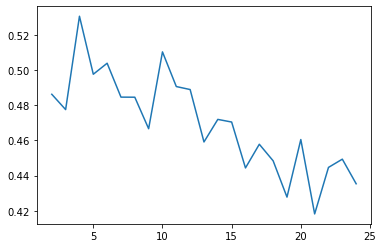

In [82]:
# visualise the coherence trend

s = pd.Series(coherence_results.score.values, index=coherence_results.topic.values)
s = s.astype(float)
s.plot()

In [136]:
# Load the k=10 model from local

final_model = gensim.models.ldamodel.LdaModel.load('goodgood1.pkl')

In [137]:
# Print 15 keywords for every topic when k = 10

final_topics = model_2.show_topics(num_words = 15)
final_topics

[(0,
  '0.016*"pain" + 0.016*"advice" + 0.015*"well" + 0.014*"exercise" + 0.014*"phone" + 0.013*"good" + 0.010*"appointment" + 0.009*"person" + 0.009*"health" + 0.009*"time" + 0.008*"patient" + 0.008*"thorough" + 0.008*"helpful" + 0.007*"back" + 0.006*"excellent"'),
 (1,
  '0.069*"staff" + 0.045*"good" + 0.032*"helpful" + 0.027*"friendly" + 0.026*"well" + 0.024*"always" + 0.021*"care" + 0.017*"excellent" + 0.014*"ward" + 0.013*"happy" + 0.012*"kind" + 0.011*"nothing" + 0.011*"service" + 0.011*"time" + 0.011*"nice"'),
 (2,
  '0.044*"staff" + 0.021*"time" + 0.012*"service" + 0.011*"member" + 0.010*"patient" + 0.008*"year" + 0.007*"team" + 0.007*"care" + 0.007*"like" + 0.007*"crisis" + 0.006*"room" + 0.006*"ward" + 0.005*"day" + 0.005*"night" + 0.005*"plan"'),
 (3,
  '0.030*"time" + 0.027*"good" + 0.025*"like" + 0.021*"patient" + 0.020*"staff" + 0.016*"ward" + 0.013*"well" + 0.013*"day" + 0.010*"people" + 0.007*"activity" + 0.006*"session" + 0.006*"food" + 0.005*"service" + 0.005*"everyon

In [138]:
len(topic_list)

5814

In [67]:
# calculate the topic probability in every comment and assign the topic with biggest probability to each comment

topic_list = []
for index, text in enumerate(comments_corpus):
    topic_prob = final_model.get_document_topics(text)  
    probs =[p for i,p in topic_prob]
    topic_index = probs.index(max(probs))
    topic_list.append(topic_index)
    print(f"topic:{topic_index} text:{texts[index]}")

topic:0 text:['appointment', 'detail', 'phone', 'physical', 'evidence', 'reminder', 'problem', 'nothing', 'apparent', 'thank', 'service', 'excellent', 'thank']
topic:0 text:['occasion', 'aware', 'appointment', 'centre', 'phone', 'call', 'mile', 'round', 'trip', 'costly', 'taxi']
topic:1 text:['blood_pressure', 'monitor', 'cuff', 'cigarette', 'quite', 'unpleasant', 'old', 'perfume', 'aftershave', 'smell', 'user', 'improvement']
topic:1 text:['staff', 'member', 'issue', 'lack', 'patience', 'capability', 'interested', 'onto', 'next', 'job']
topic:1 text:['specific', 'time', 'visit', 'early', 'late', 'morning', 'early', 'late', 'afternoon']
topic:2 text:['like', 'appointment', 'close', 'together', 'far', 'apart']
topic:1 text:['wholly', 'variable', 'speak', 'time', 'dismissive', 'nature', 'crisis', 'team']
topic:1 text:['nothing', 'blood_pressure', 'unpleasant', 'experience']
topic:0 text:['baby', 'girl', 'week', 'premature', 'mid', 'month', 'assessment', 'form', 'data_protection', 'home',

In [83]:
# Save LDA topic index for every comment and add it into LDA_comments.csv

df_topic_index = pd.DataFrame(data=topic_list)
df_topic_index.to_csv('topic_index.csv')

In [95]:
lda_comments_final = pd.read_csv('LDA_comments.csv')
lda_comments_final

,code,label,subcategory,feedback,space,lda_index,lda_topic
0,mi,Communication,Amount/clarity of information,Appointment details given over phone - no phys...,26,0,NaN
1,mm,Communication,Communication,On one occasion I was not made aware that my a...,45,0,NaN
2,eq,Environment/ facilities,Facilities/equipment,The blood pressure monitor and cuff smelt of c...,36,1,NaN
3,da,Dignity,Respect For Diversity/ Person-Centeredness,2 Staff Members I had an issue with in regards...,26,1,NaN
4,mm,Communication,Communication,"Be more specific with time of visit, i.e. earl...",15,1,NaN
...,...,...,...,...,...,...,...
5809,ce,Care received,Emotional care,The last month or so has been traumatising for...,181,1,NaN
5810,cs,Care received,Advice and support,Started to feel unwell with the thoughts aroun...,57,0,NaN
5811,ap,Access,Provision of services,"Around this time last year, I made plans to en...",428,8,NaN
5812,sp,Staff,Professionalism/Competence Of Staff,We got assigned Hazel back in 2019 to assist w...,159,3,NaN


In [96]:
# randomly pick 200 comments for validation, the text in column 'lda_topic' is filled by myself accoring to LDA topics generated before, 
# the name of LDA topics is summarised in the report

lda_validation = lda_comments_final.sample(200)

In [97]:
lda_validation.to_csv('LDA_validation.csv')